In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)

sector = 'Industrials'
industry_list = all_industries[sector]

In [4]:
print(industry_list)

['Aerospace & Defense', 'Airlines', 'Airports & Air Services', 'Building Products & Equipment', 'Business Equipment', 'Business Equipment & Supplies', 'Business Services', 'Conglomerates', 'Consulting Services', 'Diversified Industrials', 'Electrical Equipment & Parts', 'Engineering & Construction', 'Farm & Construction Equipment', 'Farm & Heavy Construction Machinery', 'Industrial Distribution', 'Infrastructure Operations', 'Integrated Freight & Logistics', 'Integrated Shipping & Logistics', 'Marine Shipping', 'Metal Fabrication', 'Pollution & Treatment Controls', 'Railroads', 'Rental & Leasing Services', 'Security & Protection Services', 'Shipping & Ports', 'Specialty Business Services', 'Specialty Industrial Machinery', 'Staffing & Employment Services', 'Staffing & Outsourcing Services', 'Tools & Accessories', 'Truck Manufacturing', 'Trucking', 'Waste Management']


In [5]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'GE', 'name': 'GE Aerospace', 'last_day_data_date': '2024-06-12', 'adjusted_close': 161.05, 'refund_1d': 0.69, 'refund_1d_p': 0.43, 'refund_5d': -1.5, 'refund_5d_p': -0.92, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 176286957568, 'earnings_share': 3.8, 'dividend_yield': 0.007, 'sector': 'Industrials', 'industry': 'Aerospace & Defense', 'avgvol_1d': 5790588, 'avgvol_200d': 5668155.63}, {'code': 'RTX', 'name': 'Raytheon Technologies Corp', 'last_day_data_date': '2024-06-12', 'adjusted_close': 106.77, 'refund_1d': -0.15, 'refund_1d_p': -0.14, 'refund_5d': -1.67, 'refund_5d_p': -1.54, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 141951778816, 'earnings_share': 2.54, 'dividend_yield': 0.0236, 'sector': 'Industrials', 'industry': 'Aerospace & Defense', 'avgvol_1d': 3429992, 'avgvol_200d': 8555131.49}, {'code': 'BA', 'name': 'The Boeing Company', 'last_day_data_date': '2024-06-12', 'adjusted_close': 182.67, 'refund_1d': -2.83, '

In [6]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

GE
RTX
BA
LMT
GD
TDG
NOC
LHX
HWM
HEI-A
HEI
TXT
CW
HII
BWXT
CAE
ERJ
MOG-B
MOG-A
HXL
SPR
AIR
VVX
CDRE
EVEX
TGI
ACHR
DCO
RGR
SKYH
PL
NPK
RDW
SPCE
PKE
LLAP
EVTL
SVT
CVU
SIF
AIRI
AULT
LOAR
DAL
LUV
ALK
CPA
VLRS
FLYX
AZUL
SAVE
SRFM
GOLLQ
ASR
PAC
JOBY
CAAP
UP
SOAR
TT
CARR
JCI
CSL
LII
BLDR
OC
MAS
WMS
TREX
FBIN
AZEK
LPX
SPXC
AWI
GMS
ASPN
JBI
ARLO
JELD
NX
APT
HNI
SCS
EBF
ACCO
MMM
VMI
MDU
GFF
SEB
CODI
BBU
CODI-PA
CODI-PB
SPLP
TRC
SPLP-PA
PLAG
EFSH
CODI-PC
EFX
BAH
TRU
FCN
VRT
HUBB
NVT
AYI
ATKR
ENS
BE
HAYW
ENR
EAF
FREY
GWH
AMPX
ESP
NXU
PWR
EME
J
BLD
ACM
FIX
APG
STN
MTZ
KBR
FLR
DY
ACA
PRIM
GVA
AMRC
TPC
AGX
ORN
VATE
CDLR
CAT
DE
CNH
AGCO
OSK
TEX
ALG
REVG
HY
LNN
WNC
TWI
MTW
GENC
LEV
GWW
FERG
WSO
CNM
WCC
AIT
SITE
MSM
GIC
BXC
EVI
WCC-PA
BEEP
UPS
FDX
ZTO
GXO
PBI
RLGT
KEX
MATX
ZIM
SFL
CMRE
DAC
NMM
ECO
ASC
GNK
NAT
CMRE-PB
SB
CMRE-PC
CMRE-PD
CMRE-PE
HSHP
SMHI
DSX
DSX-PB
KNOP
SB-PD
SB-PC
ATI
MLI
ESAB
CRS
WOR
PRLB
RYI
IIIN
MEC
TG
AP
VLTO
ZWS
FSS
ATMU
ZONE
UNP
CNI
CP
NSC
WAB
TRN
GBX
URI
AER
UHAL-B
UHAL
R
AL
GATX

In [7]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [8]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [9]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [10]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [11]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [12]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [13]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


ERJ has no Dividend Paid
ACHR has no Dividend Paid
RGR has no debt data in database
SKYH has no Dividend Paid
PL has no debt data in database
NPK has no debt data in database
RDW has no Dividend Paid
PKE has no debt data in database
LLAP has no Dividend Paid
EVTL has no debt data in database
SVT has no debt data in database
CVU has no Dividend Paid
SIF has no Dividend Paid
LOAR price error: list index out of range
ALK has no Dividend Paid
VLRS has no Dividend Paid
SRFM has no Dividend Paid
GOLLQ EBITDA Zero error
JOBY has no Dividend Paid
CAAP has no Dividend Paid
UP has no Dividend Paid
SOAR Share probably zero: float division by zero
AZEK has no Dividend Paid
ARLO has no Dividend Paid
APT has no debt data in database
EBF has no debt data in database
CODI-PA EPS Zero error
CODI-PB EPS Zero error
TRC has no Dividend Paid
SPLP-PA EPS Zero error
PLAG has no Dividend Paid
CODI-PC Share probably zero: float division by zero
FREY has no Dividend Paid
GWH has no Dividend Paid
AMPX has no deb

In [14]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

441
441
441
441
441


In [42]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Industrials.csv')

In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(18,'Debt'))
top_50s.append(positive_df.nlargest(18,'Dividend Yield'))
top_50s.append(positive_df.nlargest(18,'EPS Yield'))
top_50s.append(positive_df.nlargest(18,'FCF'))
worst_100s.append(positive_df.nlargest(150, 'Debt'))
worst_100s.append(positive_df.nsmallest(150, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(150, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(150, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [6]:
print(final_selection.shape)
print(final_selection)

(20, 5)
      Code       Debt  Dividend Yield  EPS Yield        FCF
0      MLI 0.00019851      0.01185926 0.13100697 0.11006728
9    KELYA 0.02456140      0.01356312 0.09415819 0.06234056
10   KELYB 0.02456140      0.13169083 0.10008187 0.60529454
24     PAC 1.91642961      1.36422245 0.06735307 0.07541223
25     ASR 0.60613404      1.27456520 0.06641425 1.05978849
26      TH 0.60348387      0.89122496 0.12511500 0.13045832
32    OMAB 1.19120609      0.63504549 0.07798322 0.63571948
33     HHS 0.90033312      0.60786236 0.08556150 0.13396863
34     ZTO 0.64013658      0.41820349 0.50802402 0.10239875
36    PSHG 0.82407422      0.10073338 0.86645503 2.71544969
37     GSL 1.22237345      0.08917445 0.47141074 0.33514294
38    ESEA 0.78589597      0.05661851 0.42382011 0.21660639
39     DAC 0.62238348      0.04398534 0.39863564 0.14869264
42    SGRP 0.84560473      0.08727027 0.22689769 0.06544210
44    GASS 2.29014609      0.04238738 0.21043771 0.34671128
50     CPA 1.16584890      0.043

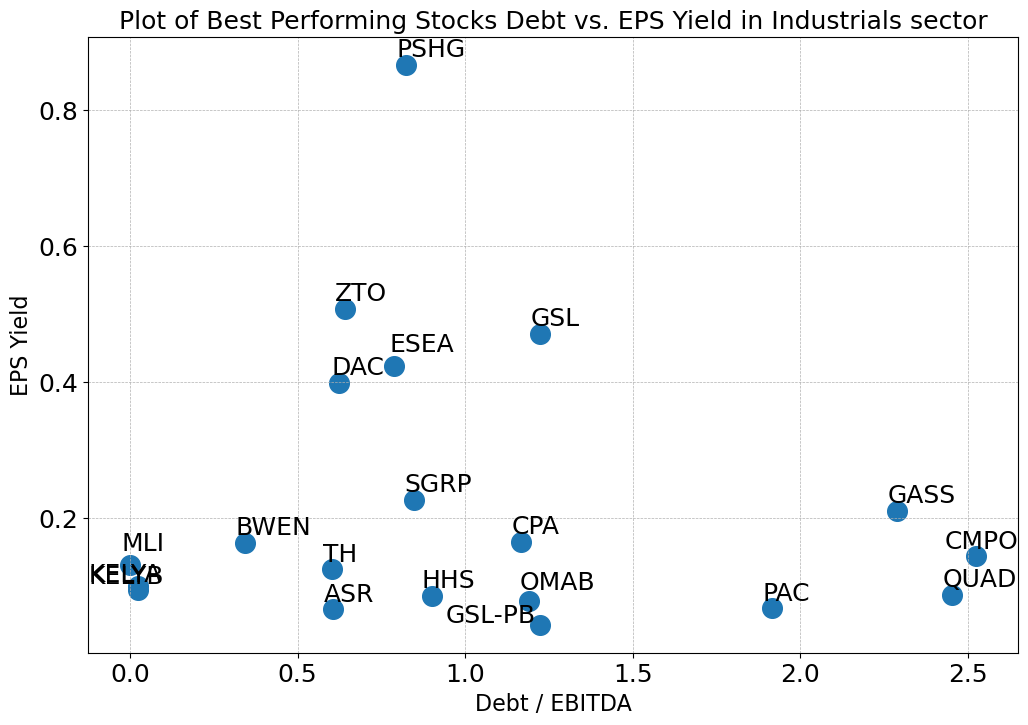

In [7]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s = 200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

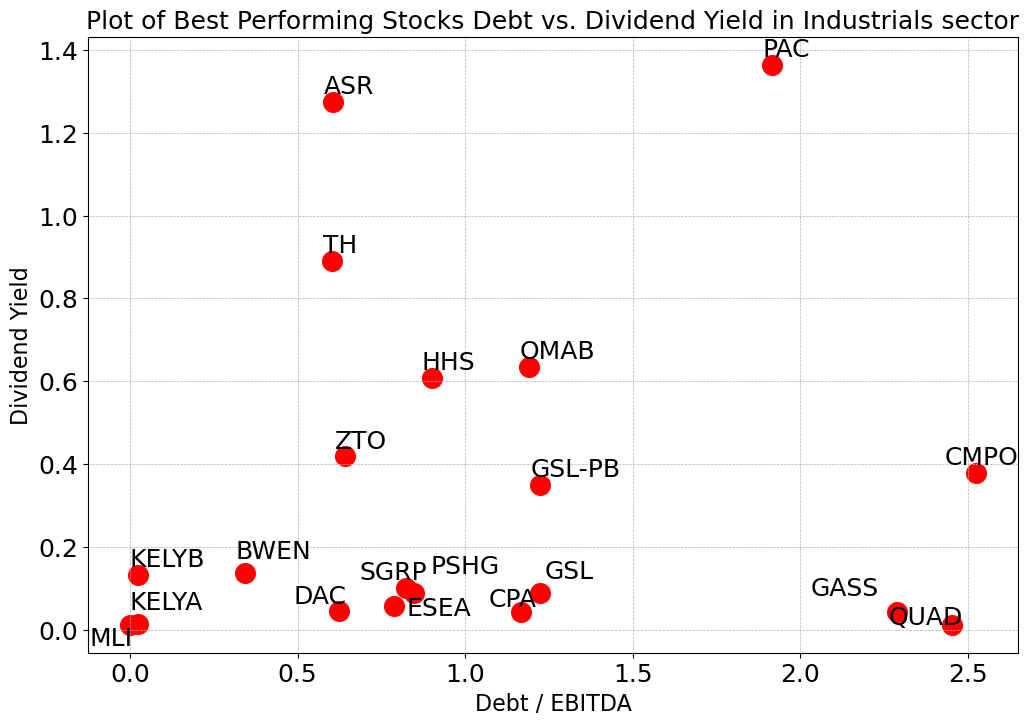

In [8]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

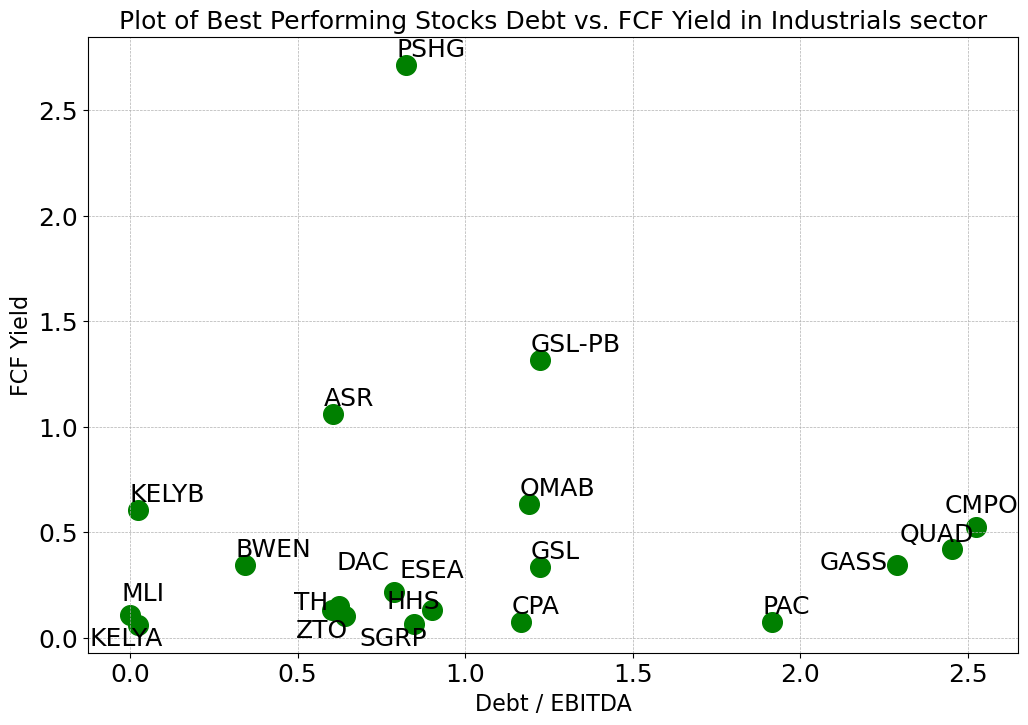

In [9]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [53]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [54]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [55]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


MLI
KELYA
KELYB
PAC
ASR
TH
OMAB
HHS
ZTO
PSHG
GSL
ESEA
DAC
SGRP
GASS
CPA
GSL-PB
CMPO
QUAD
BWEN


In [56]:
all_returns = []
for stock in stocks_Best:
    all_returns.append(get_all_returns(stock))


In [57]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [58]:
all_returns.append(GSPC_returns)

In [59]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [60]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

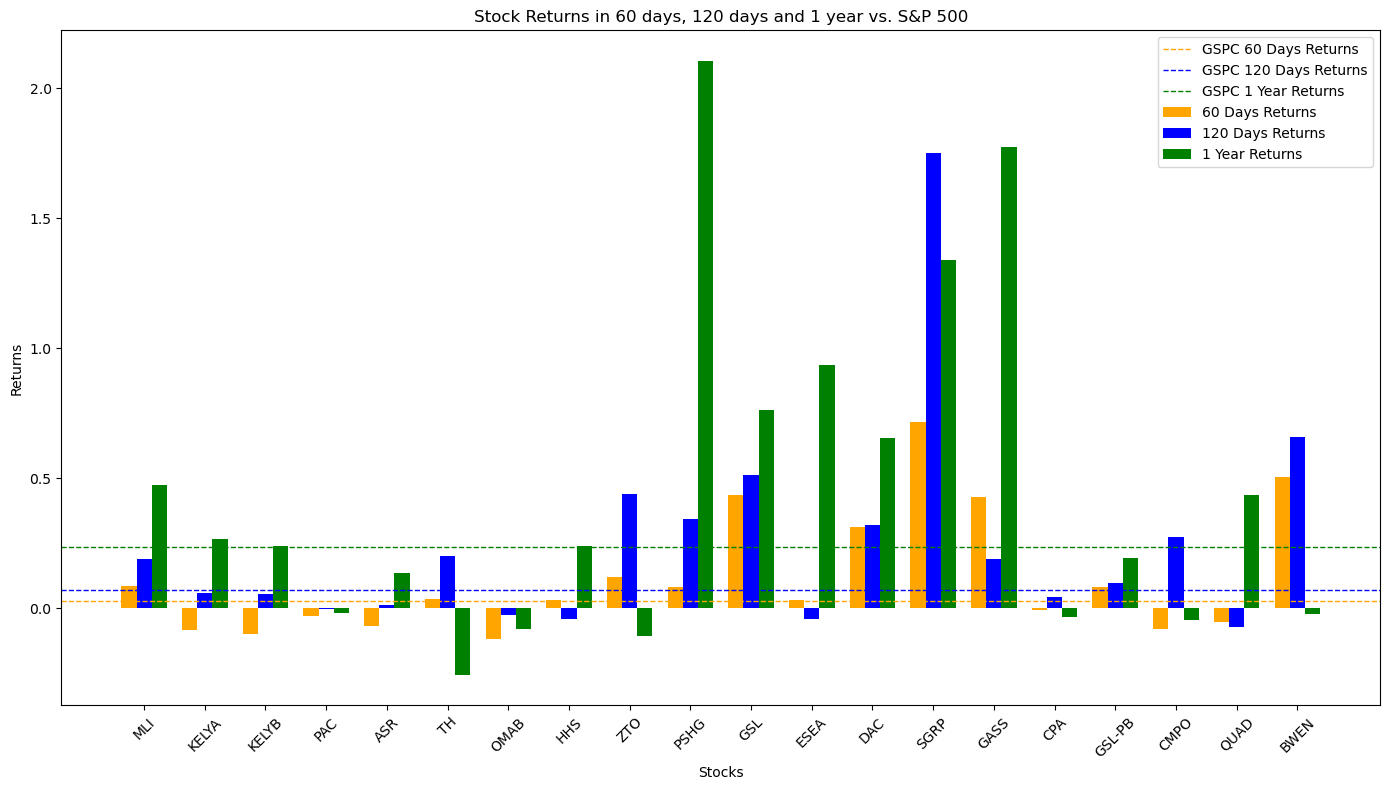

In [61]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns_.png')
plt.show()

In [62]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 11.59%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 24.74%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 44.88%
Return for Investing in S&P500 in 1 year is 23.62%


In [7]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

0        MLI
9      KELYA
10     KELYB
24       PAC
25       ASR
26        TH
32      OMAB
33       HHS
34       ZTO
36      PSHG
37       GSL
38      ESEA
39       DAC
42      SGRP
44      GASS
50       CPA
51    GSL-PB
58      CMPO
60      QUAD
62      BWEN
Name: Code, dtype: object


In [8]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

20


In [9]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[0.         0.02336198 0.0236421  0.01078698 0.04540623 0.04504756
 0.07615048 0.07151368 0.1128028  0.11241106 0.122026   0.11676165
 0.13887447 0.17562519 0.14547027 0.13803103 0.13300449 0.11292712
 0.07929142 0.08748332 0.05438518 0.06208541 0.07789535 0.05390992
 0.10453944 0.1420943  0.15368794 0.12469553 0.1831978  0.22929779
 0.22258943 0.22494366 0.18560943 0.18415768 0.23148864 0.20123941
 0.21055188 0.21723793 0.19968195 0.19278436 0.19520203 0.19725958
 0.21309975 0.25135212 0.30446715 0.24589489 0.23906653 0.29543463
 0.31069026 0.32497817 0.40744934 0.44926256 0.44883482]


In [10]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [11]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Industrials Sector is:  0.10325586441545902


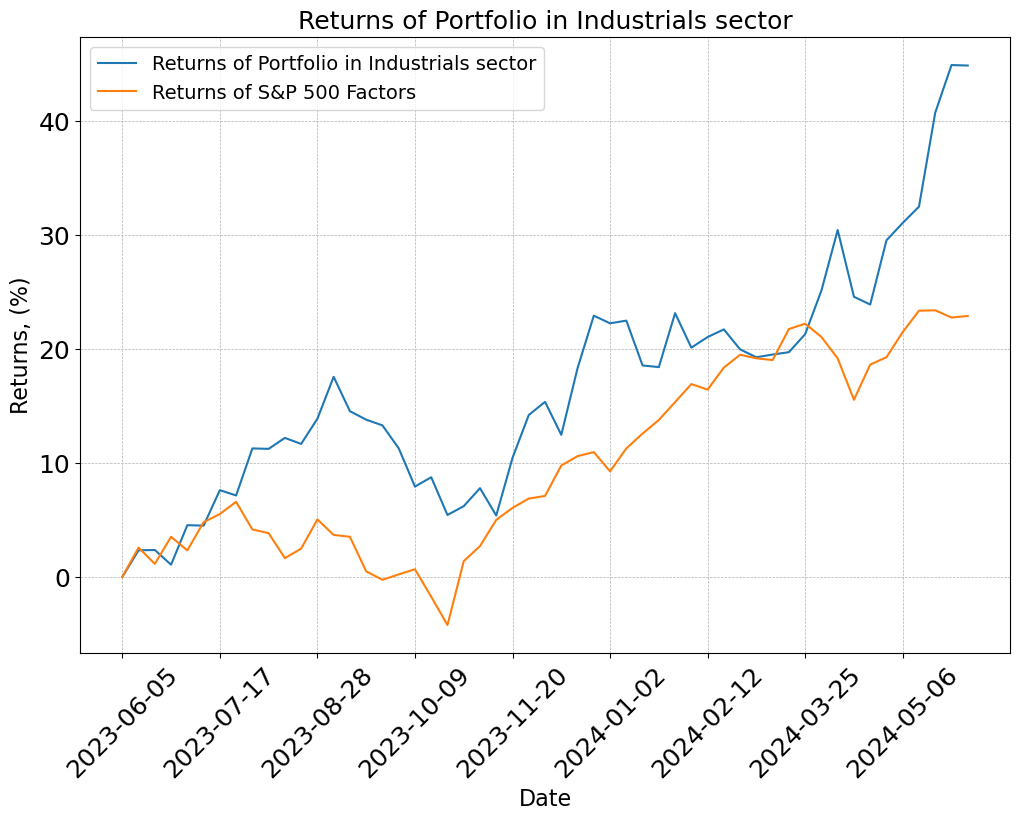

In [12]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()